In [1]:
!pip install seaborn
!pip install pandas openpyxl


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Dataset Overview:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel('walmart Retail Data.xlsx')
print("Dataset Head:")
print(data.head())

print("\nDataset Info:")
data.info()

print("\nStatistical Summary:")
print(data.describe())


Dataset Head:
         City  Customer Age      Customer Name Customer Segment  Discount  \
0  McKeesport           NaN     Jessica Myrick   Small Business      0.10   
1       Bowie           NaN     Matt Collister      Home Office      0.08   
2        Napa           NaN  Alan Schoenberger        Corporate      0.00   
3  Montebello           NaN  Elizabeth Moffitt         Consumer      0.08   
4        Napa           NaN  Alan Schoenberger        Corporate      0.07   

   Number of Records Order Date  Order ID Order Priority  Order Quantity  ...  \
0                  1 2012-01-01     28774           High              32  ...   
1                  1 2012-01-01     13729  Not Specified               9  ...   
2                  1 2012-01-02     37537            Low               4  ...   
3                  1 2012-01-02     44069       Critical              43  ...   
4                  1 2012-01-02     37537            Low              43  ...   

    Profit Region Row ID    Sales  S

## Checking for missing values:


Missing Values:
City                      0
Customer Age            903
Customer Name             0
Customer Segment          0
Discount                  0
Number of Records         0
Order Date                0
Order ID                  0
Order Priority            0
Order Quantity            0
Product Base Margin      63
Product Category          0
Product Container         0
Product Name              0
Product Sub-Category      0
Profit                    0
Region                    0
Row ID                    0
Sales                     0
Ship Date                 0
Ship Mode                 0
Shipping Cost             0
State                     0
Unit Price                0
Zip Code                  0
dtype: int64


<Axes: >

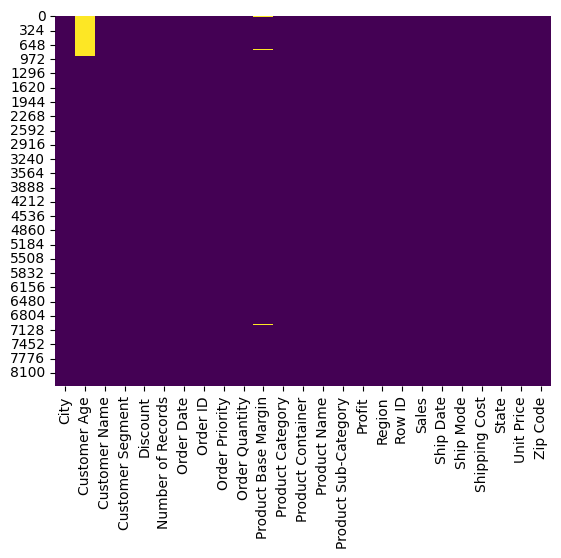

In [4]:
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')



## Categorizing Data Types:

In [5]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)



Numerical Columns: Index(['Customer Age', 'Discount', 'Number of Records', 'Order ID',
       'Order Quantity', 'Product Base Margin', 'Profit', 'Row ID', 'Sales',
       'Shipping Cost', 'Unit Price', 'Zip Code'],
      dtype='object')
Categorical Columns: Index(['City', 'Customer Name', 'Customer Segment', 'Order Priority',
       'Product Category', 'Product Container', 'Product Name',
       'Product Sub-Category', 'Region', 'Ship Mode', 'State'],
      dtype='object')


## Univariate Analysis:

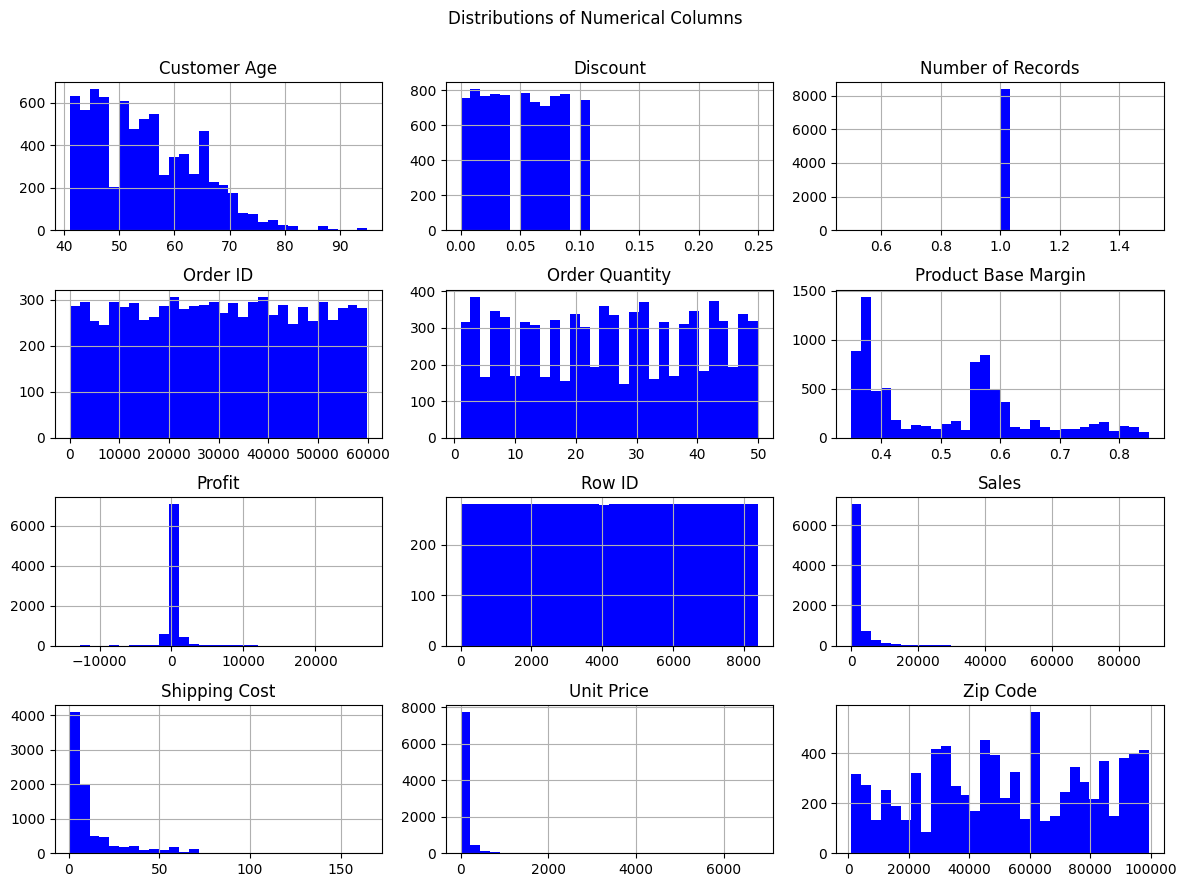

In [6]:
import matplotlib.pyplot as plt

# Plot distributions for numerical columns
data[numerical_columns].hist(figsize=(12, 9), bins=30, color='blue')
plt.suptitle('Distributions of Numerical Columns')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the title position
plt.show()


C:\Users\22501\AppData\Local\Temp\ipykernel_35788\1763215593.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], hue=None, palette='Set2')  # Avoid warning by not using hue=data[col]


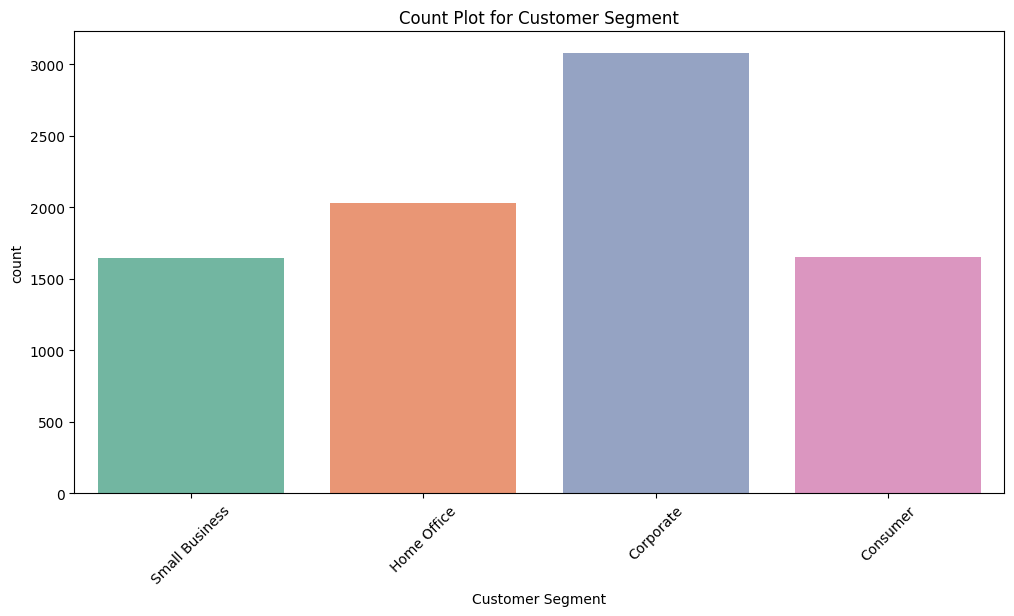

C:\Users\22501\AppData\Local\Temp\ipykernel_35788\1763215593.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], hue=None, palette='Set2')  # Avoid warning by not using hue=data[col]


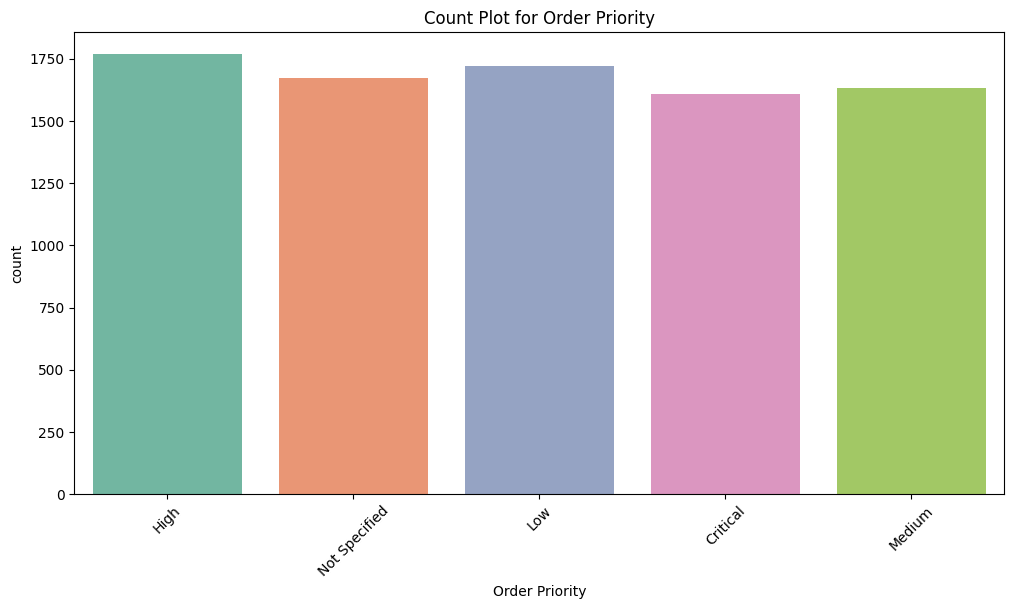

C:\Users\22501\AppData\Local\Temp\ipykernel_35788\1763215593.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], hue=None, palette='Set2')  # Avoid warning by not using hue=data[col]


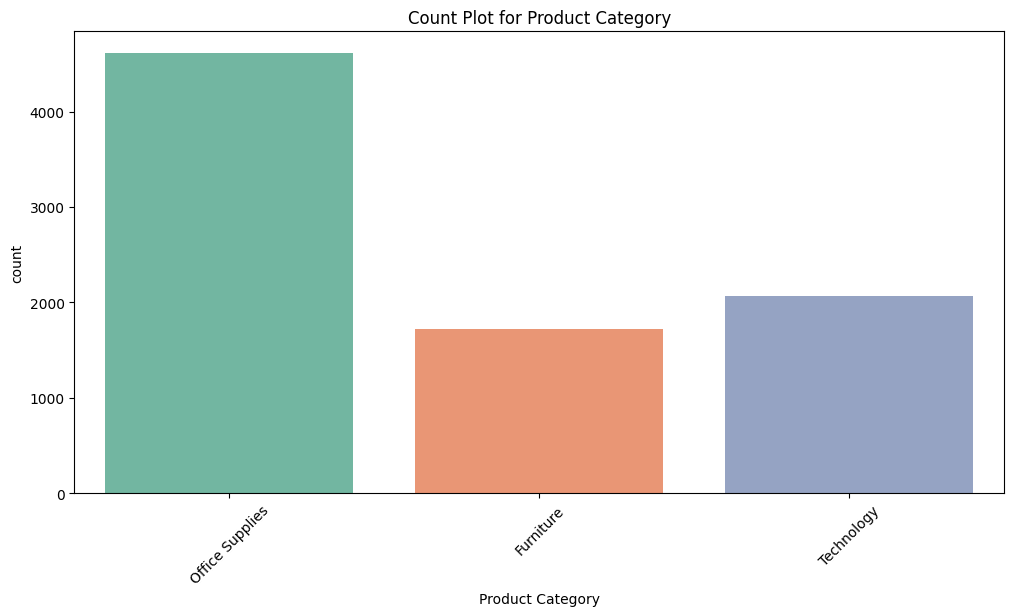

C:\Users\22501\AppData\Local\Temp\ipykernel_35788\1763215593.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], hue=None, palette='Set2')  # Avoid warning by not using hue=data[col]


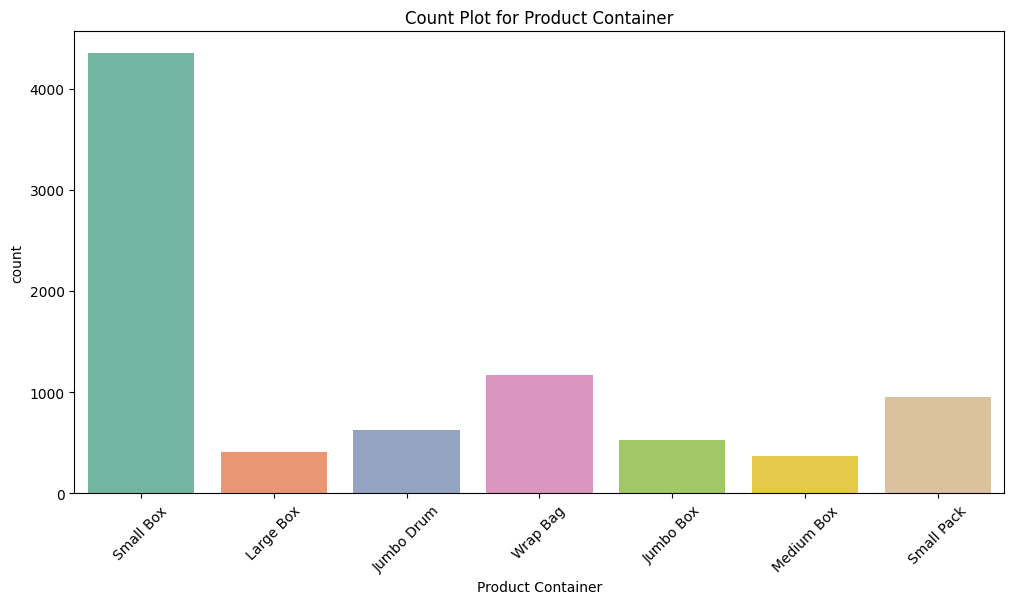

C:\Users\22501\AppData\Local\Temp\ipykernel_35788\1763215593.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], hue=None, palette='Set2')  # Avoid warning by not using hue=data[col]


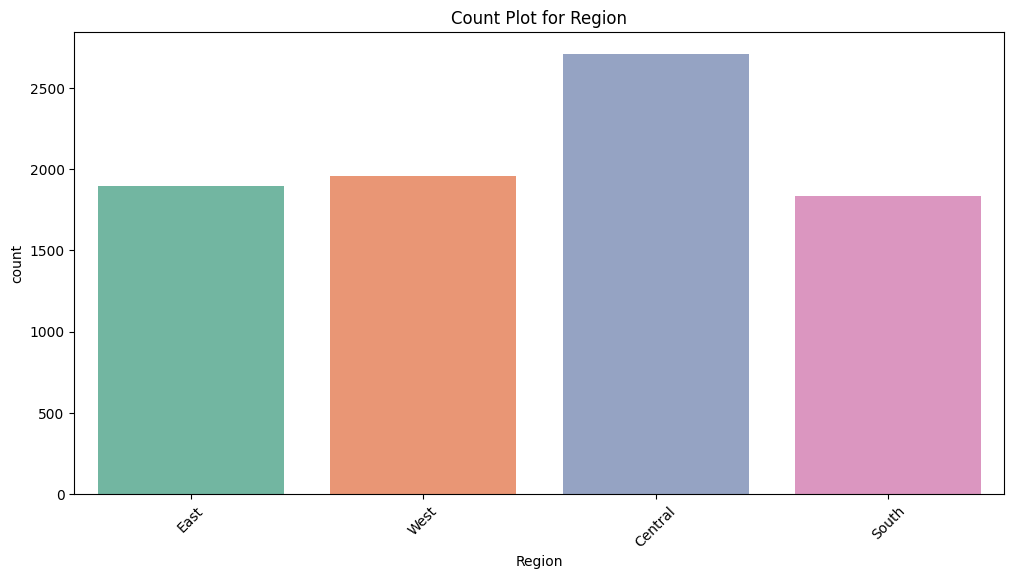

C:\Users\22501\AppData\Local\Temp\ipykernel_35788\1763215593.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], hue=None, palette='Set2')  # Avoid warning by not using hue=data[col]


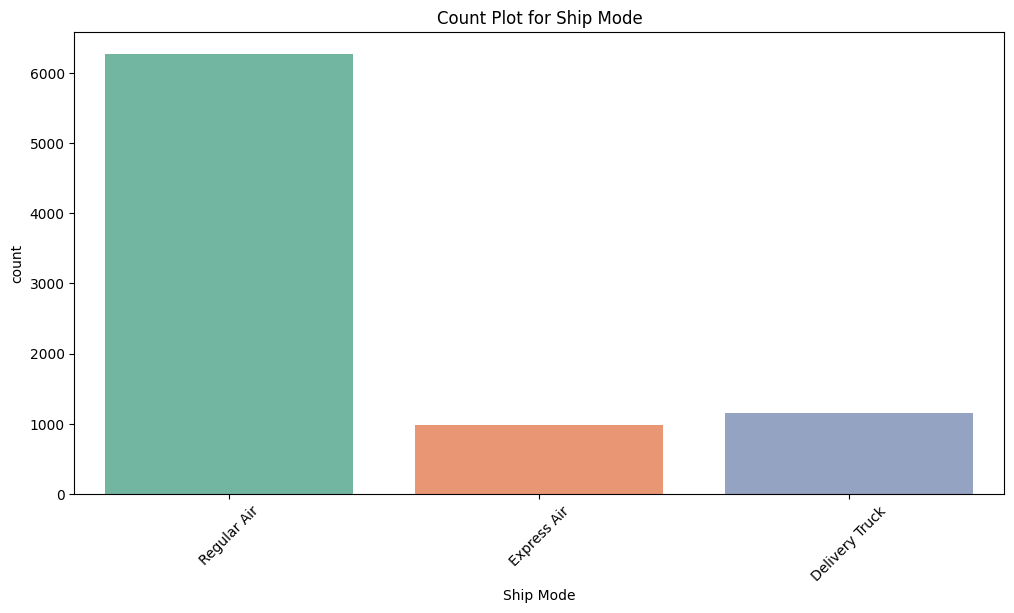

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count plots for remaining categorical columns
exclude_columns = ['State', 'City', 'Customer Name', 'Product Name','Product Sub-Category']
filtered_categorical_columns = [col for col in categorical_columns if col not in exclude_columns]

# Plot count plots for remaining categorical columns
for col in filtered_categorical_columns:
    plt.figure(figsize=(12, 6))  # Adjust figure size
    sns.countplot(x=data[col], hue=None, palette='Set2')  # Avoid warning by not using hue=data[col]
    plt.title(f'Count Plot for {col}')
    
    # Rotate labels for readability
    plt.xticks(rotation=45, fontsize=10)  # Adjust rotation and font size
    
    plt.show()


## Bivariate Analysis:

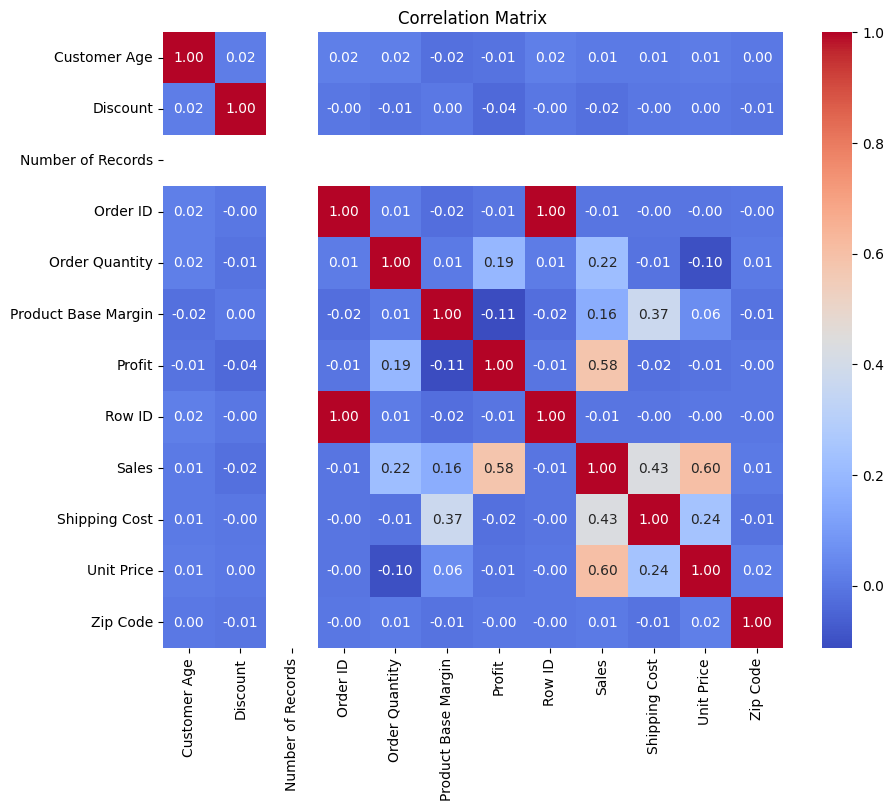

In [25]:
numerical_df = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()